In [1]:
# !pip install sentence-transformers
from sentence_transformers import SentenceTransformer, util

In [2]:
# Initialize the model
NLPmodel = SentenceTransformer('./sentence-transformers_all-MiniLM-L6-v2') # SentenceTransformer('all-MiniLM-L6-v2')

## Use our data

In [3]:
# import other packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
param_name = 'playfight'

In [5]:
expt_type = 'playfight/with_cover_story/'
rootfile_loc = f'../../data/text_responses/{expt_type}'

In [6]:
df =  pd.read_csv(f'{rootfile_loc}/data_triallevel_sorted.csv',index_col=[0])
# df =  pd.read_csv('../data/collected_data/data_triallevel_sorted.csv',index_col=[0])
df.head()

,subID,stimset_rows,chargeSpeeds,responses,movie,trial_num
6,24093,10,1.5,They are peaceful,29e7c94f-a6bf-4f1d-8ea1-46efbdb6a836,6
6,24066,59,1.5,Slowly coming together to bump each other.,1a8cf3c1-690b-449c-bb36-fd3b251837c1,6
6,24067,90,1.5,Bumping into each other,e838dadb-c02f-4273-ae93-210720dcd06c,6
5,24068,57,1.5,They are kicking a ball.,31e1789e-459a-4f3d-bfdd-2f4c8c4e9f50,5
4,24069,42,1.5,playing frisbee,8ed7c0fc-1490-4e35-a000-7f7357a0772a,4


## NLP algo

In [7]:
words_to_compare = df['responses'].to_list()
words_to_compare = [s.lower() for s in words_to_compare]
words_to_compare

['they are peaceful ',
 'slowly coming together to bump each other.',
 'bumping into each other',
 'they are kicking a ball.',
 'playing frisbee',
 'playing with each other',
 'the dots were slowly drifting together and apart in a repetitive way',
 'synchronised dancing',
 'playing together ',
 'interacting with each other by playing',
 'charging',
 'they were playing a game together',
 'playing independently near each other',
 'clashing',
 'running around',
 'slowly moving and touching one another',
 'chase',
 'playing a game',
 'catch with a ball',
 'playing',
 'running',
 'running around the park',
 'dancing',
 'playing red rover',
 'playing catch',
 'running toward each other',
 'just running around',
 'moving much slower around',
 'interacting or bumping into each other',
 'mirroring one another',
 'talking and exploring the park',
 'playing and handing each other objects',
 'running back and forth like a relay race',
 'the dots were gently bumping into each other repeatedly, much

In [8]:
excluded_words_list = ['dots','dot','around','dont know',"don't know",'black','grey','gray', 'color', 'colors','shape', 'shapes', 'one', 'ones','ball',\
    'balls','twice', '.', ';', ':', '-', ' the ', ' and ', ' a ', ' an ', ' is ', ' are ', ' and ', ' or ', 'between']

In [9]:
def skip_excluded_words(txt):
    txt = txt.lower()
    for words in excluded_words_list:
        txt = txt.replace(words,' ')
    return txt

skip_excluded_words('This is black.')

'this   '

In [10]:
# ref_words = ['follow','chase','wander','move','independent', 'moveInd']
# ref_words = ['play','fight','wander','move','independent','play_fight']
ref_words = ['play','fight', 'play_fight']

In [11]:
# Encode the reference phrase and the words to compare

similarity_all_1 = []
similarity_all_2= []

for ref_word in ref_words[:-1]:

    # if ref_word == 'play_fight':
    #     continue
    # else:
    reference_embedding = NLPmodel.encode(ref_word)

    data_embeddings = NLPmodel.encode(words_to_compare)

    # Compare and print similarities
    for embedding in data_embeddings:

        similarity = util.pytorch_cos_sim(reference_embedding, embedding) # similarity between ref word and each response
        
        if ref_word in ['play','playing']:
            similarity_all_1.append(similarity.item())

        if ref_word in ['fight','fighting']:
            similarity_all_2.append(similarity.item())

df['similarity_play'] = similarity_all_1
df['similarity_fight'] = similarity_all_2
df['similarity_play_fight'] = df['similarity_play'] - df['similarity_fight']

In [12]:
df.rename(columns = {'chargeSpeeds':'chargeSpeed'},inplace=True)
df.sort_values(by=['chargeSpeed','subID'],inplace=True)
df

,subID,stimset_rows,chargeSpeed,responses,movie,trial_num,similarity_play,similarity_fight,similarity_play_fight
6,24000,22,1.5,playing,81e3fe3f-5a7c-42d3-8ea7-c2bf3831288b,6,0.887281,0.454840,0.432441
6,24001,5,1.5,dancing,b3a507ff-2289-4ad3-8922-1a3d0532e154,6,0.376770,0.333683,0.043087
5,24003,85,1.5,aimlessly running around,1b1159fc-de2b-4ae5-a736-d98d8524a366,5,0.326775,0.266552,0.060223
3,24004,88,1.5,bumping,38ad4b16-44e2-4e52-8d02-b23eca73a48d,3,0.252325,0.317343,-0.065019
6,24005,27,1.5,moving NW and slowly meeting,8ed7c0fc-1490-4e35-a000-7f7357a0772a,6,0.173475,0.173423,0.000052
...,...,...,...,...,...,...,...,...,...
2,24097,84,9.0,wrestling,a5228b86-ba0a-42f2-aa38-23b5369f0e56,2,0.246261,0.509682,-0.263420
4,24098,41,9.0,Using the same playground equipment,7d40f846-95bc-4c08-b7a1-b4a410852b77,4,0.287940,0.052704,0.235236
6,24099,86,9.0,They are colliding to each other.,6e2932f2-a9d1-4f2a-9599-a872b605c1eb,6,0.252616,0.361161,-0.108545
1,24100,71,9.0,playing,7a2ccf3c-feb4-4b5c-9c03-44c10f774f9a,1,0.887281,0.454840,0.432441


In [13]:
rootfile_loc

'../../data/text_responses/playfight/with_cover_story/'

In [14]:
df.to_csv(f'{rootfile_loc}NLP_analyses/data_with_similarity_scores.csv')

# Figures

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

s=14 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=14) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend

color_plots = 'tab:red' # or tab:red

In [17]:
# inds = [[0,0],[0,1],[1,0],[1,1],[1,2],[0,2]]
# words_pos_dict = dict(zip(ref_words,inds))
# words_pos_dict

In [18]:
out_loc = '../../results/text_analysis/pf/with_cover_story/'

In [19]:
param_name = 'chargeSpeed'

In [20]:
df.groupby(['chargeSpeed']).mean()

,subID,stimset_rows,trial_num,similarity_play,similarity_fight,similarity_play_fight
chargeSpeed,,,,,,
1.50,24051.505376,39.354839,3.043011,0.346419,0.276764,0.069656
2.75,24050.500000,39.362745,2.803922,0.412548,0.294549,0.117999
4.00,24050.500000,39.362745,3.186275,0.358748,0.302091,0.056656
5.25,24050.500000,39.362745,2.892157,0.353946,0.355125,-0.001179
6.50,24050.500000,39.362745,2.970588,0.340629,0.348775,-0.008146
7.75,24050.500000,39.362745,3.205882,0.364341,0.351415,0.012927
9.00,24050.500000,39.362745,2.637255,0.342351,0.352846,-0.010495


In [21]:
ref_words

['play', 'fight', 'play_fight']

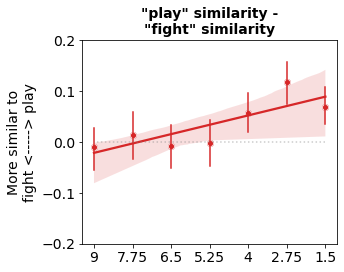

In [22]:
# nrows,ncols = 2,3
# fig,axs = plt.subplots(nrows = 2, ncols = 3, figsize = (12,6), sharey = False)
fig,ax = plt.subplots(nrows=1,ncols=1,figsize = (5,4))

word = 'play_fight'
sns.lineplot(data=df.reset_index(),x = param_name,y = 'similarity_' + word,\
    ax=ax,marker = 'o', ls = 'None', color = color_plots, err_style='bars')
sns.regplot(data=df.groupby([param_name]).mean().reset_index(),x = param_name,y = 'similarity_' + word,\
    ax=ax,marker = 'o', color = color_plots)
ax.set_xticks(np.unique(df[param_name]))
if word != 'play_fight':
    ax.set_title(f'"{word}" similarity', fontweight = 'bold')
    ax.set_yticks([0.1,0.2,0.3,0.4,.5])
else:
    ax.set_title(f'"play" similarity -\n"fight" similarity', fontweight = 'bold')
    ax.hlines(0,1.5,9,color = 'grey',ls = ':',alpha=.4)
    ax.set_yticks([-.2,-.1,0,0.1,0.2])
ax.set_ylabel('More similar to\nfight <-----> play')
ax.set_xlabel('')
ax.set_xticks(np.arange(1.5,9.1,1.25),['1.5','2.75','4','5.25','6.5','7.75','9'])
ax.invert_xaxis()

plt.tight_layout()
plt.savefig(f'{out_loc}word_similarity.png',dpi=300,bbox_inches ='tight')

### Stat + plots

In [27]:
from pymer4.models import Lmer
from pymer4.stats import vif
from scipy.stats import zscore

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [28]:
df['chargeSpeed'] = zscore(df['chargeSpeed'])
df

,subID,stimset_rows,chargeSpeed,responses,movie,trial_num,similarity_play,similarity_fight,similarity_wander,similarity_move,similarity_independent,similarity_play_fight
6,24000,22,-1.531702,playing,81e3fe3f-5a7c-42d3-8ea7-c2bf3831288b,6,0.887281,0.454840,0.314943,0.369590,0.308837,0.432441
6,24001,5,-1.531702,dancing,b3a507ff-2289-4ad3-8922-1a3d0532e154,6,0.376770,0.333683,0.391984,0.389090,0.240716,0.043087
5,24003,85,-1.531702,aimlessly running around,1b1159fc-de2b-4ae5-a736-d98d8524a366,5,0.326775,0.266552,0.378598,0.330485,0.285862,0.060223
3,24004,88,-1.531702,bumping,38ad4b16-44e2-4e52-8d02-b23eca73a48d,3,0.252325,0.317343,0.222343,0.293224,0.171986,-0.065019
6,24005,27,-1.531702,moving NW and slowly meeting,8ed7c0fc-1490-4e35-a000-7f7357a0772a,6,0.173475,0.173423,0.362493,0.490650,0.063473,0.000052
...,...,...,...,...,...,...,...,...,...,...,...,...
2,24097,84,1.493088,wrestling,a5228b86-ba0a-42f2-aa38-23b5369f0e56,2,0.246261,0.509682,0.169802,0.299607,0.174845,-0.263420
4,24098,41,1.493088,Using the same playground equipment,7d40f846-95bc-4c08-b7a1-b4a410852b77,4,0.287940,0.052704,0.070623,0.128253,0.088960,0.235236
6,24099,86,1.493088,They are colliding to each other.,6e2932f2-a9d1-4f2a-9599-a872b605c1eb,6,0.252616,0.361161,0.033999,0.164491,0.111029,-0.108545
1,24100,71,1.493088,playing,7a2ccf3c-feb4-4b5c-9c03-44c10f774f9a,1,0.887281,0.454840,0.314943,0.369590,0.308837,0.432441


In [29]:
ref_words

['play', 'fight', 'wander', 'move', 'independent', 'play_fight']

In [30]:
model = Lmer(f'similarity_{ref_words[0]} ~ chargeSpeed +  (1|subID) + (1|movie)', data=df) # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: similarity_play~chargeSpeed+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 705	 Groups: {'movie': 140.0, 'subID': 102.0}

Log-likelihood: 206.444 	 AIC: -412.888

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.000
subID     (Intercept)  0.011  0.104
Residual               0.026  0.162

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.360,0.336,0.383,0.012,101.159,30.051,0.000,***
chargeSpeed,-0.009,-0.021,0.003,0.006,603.687,-1.446,0.149,


In [31]:
model = Lmer(f'similarity_{ref_words[0]} ~ chargeSpeed +  (1|subID)', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: similarity_play~chargeSpeed+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 705	 Groups: {'subID': 102.0}

Log-likelihood: 206.444 	 AIC: -412.888

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.011  0.104
Residual               0.026  0.162

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.360,0.336,0.383,0.012,101.159,30.051,0.000,***
chargeSpeed,-0.009,-0.021,0.003,0.006,603.687,-1.446,0.149,


In [32]:
model = Lmer(f'similarity_{ref_words[1]} ~ chargeSpeed +  (1|subID) + (1|movie)', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: similarity_fight~chargeSpeed+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 705	 Groups: {'movie': 140.0, 'subID': 102.0}

Log-likelihood: 236.083 	 AIC: -472.166

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.011
subID     (Intercept)  0.008  0.089
Residual               0.025  0.157

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.326,0.305,0.347,0.011,95.684,30.506,0.0,***
chargeSpeed,0.028,0.016,0.040,0.006,100.899,4.643,0.0,***


In [33]:
model = Lmer(f'similarity_{ref_words[1]} ~ chargeSpeed +  (1|subID) ', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: similarity_fight~chargeSpeed+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 705	 Groups: {'subID': 102.0}

Log-likelihood: 236.067 	 AIC: -472.134

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.008  0.089
Residual               0.025  0.158

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.326,0.305,0.347,0.011,101.434,30.603,0.0,***
chargeSpeed,0.028,0.016,0.039,0.006,604.224,4.687,0.0,***


In [34]:
model = Lmer(f'similarity_{ref_words[2]} ~ chargeSpeed  +  (1|subID) + (1|movie)', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: similarity_wander~chargeSpeed+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 705	 Groups: {'movie': 140.0, 'subID': 102.0}

Log-likelihood: 560.114 	 AIC: -1120.228

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.011
subID     (Intercept)  0.005  0.067
Residual               0.009  0.097

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.228,0.213,0.243,0.008,98.391,29.764,0.000,***
chargeSpeed,-0.009,-0.017,-0.002,0.004,101.556,-2.451,0.016,*


In [35]:
model = Lmer(f'similarity_{ref_words[2]} ~ chargeSpeed  +  (1|subID) ', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: similarity_wander~chargeSpeed+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 705	 Groups: {'subID': 102.0}

Log-likelihood: 560.009 	 AIC: -1120.018

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.005  0.067
Residual               0.009  0.097

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.228,0.213,0.243,0.008,100.776,29.974,0.000,***
chargeSpeed,-0.009,-0.016,-0.002,0.004,603.142,-2.501,0.013,*


In [36]:
model = Lmer(f'similarity_{ref_words[2]} ~ chargeSpeed  +  (1|subID)', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: similarity_wander~chargeSpeed+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 705	 Groups: {'subID': 102.0}

Log-likelihood: 560.009 	 AIC: -1120.018

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.005  0.067
Residual               0.009  0.097

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.228,0.213,0.243,0.008,100.776,29.974,0.000,***
chargeSpeed,-0.009,-0.016,-0.002,0.004,603.142,-2.501,0.013,*


In [37]:
model = Lmer(f'similarity_{ref_words[3]} ~ chargeSpeed +  (1|subID) + (1|movie) ', data=df) # ff: anglesm rfx: subject ID # + (1|movie)
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: similarity_move~chargeSpeed+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 705	 Groups: {'movie': 140.0, 'subID': 102.0}

Log-likelihood: 740.680 	 AIC: -1481.361

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.000
subID     (Intercept)  0.003  0.053
Residual               0.006  0.075

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.275,0.263,0.286,0.006,101.08,46.101,0.000,***
chargeSpeed,-0.004,-0.010,0.001,0.003,603.41,-1.488,0.137,


In [38]:
model = Lmer(f'similarity_{ref_words[3]} ~ chargeSpeed +  (1|subID)', data=df) # ff: anglesm rfx: subject ID # + (1|movie)
model.fit()

Formula: similarity_move~chargeSpeed+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 705	 Groups: {'subID': 102.0}

Log-likelihood: 740.680 	 AIC: -1481.361

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.003  0.053
Residual               0.006  0.075

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.275,0.263,0.286,0.006,101.08,46.101,0.000,***
chargeSpeed,-0.004,-0.010,0.001,0.003,603.41,-1.488,0.137,


In [39]:
model = Lmer(f'similarity_{ref_words[4]} ~ chargeSpeed +  (1|subID) + (1|movie) ', data=df) # ff: anglesm rfx: subject ID # + (1|movie)
model.fit()

Formula: similarity_independent~chargeSpeed+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 705	 Groups: {'movie': 140.0, 'subID': 102.0}

Log-likelihood: 893.721 	 AIC: -1787.441

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.006
subID     (Intercept)  0.002  0.049
Residual               0.003  0.059

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.166,0.155,0.176,0.005,98.339,30.971,0.000,***
chargeSpeed,-0.003,-0.007,0.002,0.002,114.848,-1.190,0.236,


In [40]:
model = Lmer(f'similarity_{ref_words[4]} ~ chargeSpeed +  (1|subID)', data=df) # ff: anglesm rfx: subject ID # + (1|movie)
model.fit()

Formula: similarity_independent~chargeSpeed+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 705	 Groups: {'subID': 102.0}

Log-likelihood: 893.648 	 AIC: -1787.296

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.002  0.049
Residual               0.004  0.059

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.166,0.155,0.176,0.005,100.961,31.144,0.000,***
chargeSpeed,-0.003,-0.007,0.002,0.002,603.004,-1.226,0.221,


In [41]:
model = Lmer(f'similarity_{ref_words[5]} ~ chargeSpeed +  (1|subID) + (1|movie)', data=df) # ff: anglesm rfx: subject ID # + (1|movie)
model.fit()

Formula: similarity_play_fight~chargeSpeed+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 705	 Groups: {'movie': 140.0, 'subID': 102.0}

Log-likelihood: 93.476 	 AIC: -186.953

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.003  0.051
subID     (Intercept)  0.005  0.071
Residual               0.038  0.195

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.032,0.010,0.054,0.011,106.866,2.870,0.005,**
chargeSpeed,-0.037,-0.053,-0.020,0.009,116.252,-4.278,0.000,***


In [42]:
model = Lmer(f'similarity_{ref_words[5]} ~ chargeSpeed +  (1|subID)', data=df) # ff: anglesm rfx: subject ID # + (1|movie)
model.fit()

Formula: similarity_play_fight~chargeSpeed+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 705	 Groups: {'subID': 102.0}

Log-likelihood: 91.128 	 AIC: -182.256

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.005  0.074
Residual               0.040  0.201

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.033,0.013,0.054,0.011,101.693,3.176,0.002,**
chargeSpeed,-0.037,-0.052,-0.022,0.008,605.553,-4.859,0.000,***


## data-driven approach

In [43]:
# import nltk
# # nltk.download('wordnet')

# from nltk.corpus import wordnet as wn

# # Retrieve all English lemmas in WordNet
# lemmas = wn.all_lemma_names(pos=wn.VERB)#NOUN)

# # Convert lemmas to a list
# english_words = list(lemmas)

# print(english_words[:100]), len(english_words)

# english_words = [i for i in english_words if '-' not in i]
# english_words = [i for i in english_words if '_' not in i]
# english_words_embedding = NLPmodel.encode(english_words)

# print(english_words_embedding.shape)

# df_words = pd.DataFrame({'words':english_words, 'word_len':[len(i) for i in english_words], 'embedding':english_words_embedding.tolist()})
# df_words

In [44]:
# df_words.shape

In [45]:
# words_to_compare = df['responses'].to_list()

In [46]:
# master_verb_list = df_words['words'].values
# master_verb_list = master_verb_list[~np.isin(master_verb_list, ['dot', 'black', 'grey', 'gray','blackball'])]
# master_embeddings = NLPmodel.encode(master_verb_list)#words_to_compare)

# representative_verb = []
# for i,reference_phrase in enumerate(words_to_compare): # participant responsesa
#     reference_embedding = NLPmodel.encode(reference_phrase)
#     all_similarity = []
#     for embedding in master_embeddings: # all english verbs' embeddings
#         similarity = util.pytorch_cos_sim(reference_embedding, embedding)
#         all_similarity.append(similarity.mean().item())
#     all_similarity = np.array(all_similarity)
#     # all_similarity = all_similarity[all_similarity not in ['dot','black','grey','gray']
#     words_to_compare = np.array(words_to_compare)
#     # word = words_to_compare[all_similarity == np.nanmax(all_similarity)]
#     word = master_verb_list[all_similarity == np.nanmax(all_similarity)]
#     representative_verb.append(word[0])
# df['representative_verb'] = representative_verb
# df.head()

In [47]:
# english_words_embedding = df_words['embedding'].values
# english_words =  df_words['words'].values

In [48]:
# excluded_words_list = ['dot','dots','grey','gray','black'] #'blacken','blackguard','blackball','blackleg','blacktop','blacklead','collide'] #['dot']
# # excluded_words_list.extend(['grey','gray','black'])
# excluded_words_list

In [49]:
# # word_embedding per chargeSpeed level - comparison to the whole

# mean_embedding = []
# for cspeed in np.unique(df['chargeSpeed']):
#     print(cspeed*7.5+1.5)
#     df_cspeed = df.loc[df['chargeSpeed']==cspeed,:]
#     words_to_compare = df_cspeed['responses'].to_list()
#     words_to_compare =  [s.lower() for s in words_to_compare]
#     mean_embedding_pf = NLPmodel.encode(words_to_compare)
#     mean_embedding_pf = np.nanmedian(mean_embedding_pf,axis=0) # np.nanmean(all_embeddings_currSpeed,axis=0)
#     # mean_embedding.append(mean_embedding_pf)

#     # for mean_embedding_curr in mean_embedding: # responses
#     mean_embedding_curr = mean_embedding_pf
#     # Compare and print similarities
#     # for word, embedding in zip(words_to_compare, word_embeddings):
#     all_similarity = []
#     for embedding in english_words_embedding: #english words
#         similarity = util.pytorch_cos_sim(mean_embedding_curr, embedding)
#         all_similarity.append(similarity.mean().item())
    
#     all_similarity = np.array(all_similarity)
    
#     # word = english_words[np.where(all_similarity == np.nanmax(all_similarity))[0][0]]
#     # print(f"most representative word: {word}")

#     df_temp = pd.DataFrame({'english_words':english_words, 'all_similarity':all_similarity})
#     df_temp = df_temp[~df_temp['english_words'].isin(excluded_words_list)]
#     df_temp = df_temp.reset_index()
#     df_temp.sort_values(by='all_similarity',inplace=True, ascending=False)
#     print(f"most representative words: {df_temp.iloc[:10,1].values}")
#     # take top 10 words


In [50]:
# # word_embedding per chargeSpeed level - comparison to the whole

# all_similarity = []
# for i in mean_embedding:
#     # Compare and print similarities
#     # for word, embedding in zip(words_to_compare, word_embeddings):

#     similarity_speed = []
#     for j in mean_embedding:
#         similarity_speed.append(util.pytorch_cos_sim(i, j).mean().item())

#     all_similarity.append(similarity_speed)

# all_similarity = np.array(all_similarity)
    
#     # word = english_words[np.where(all_similarity == np.nanmin(all_similarity))[0][0]]
#     # print(f"most representative word: {word}")
# sns.heatmap(all_similarity, cmap = 'RdBu_r',vmin = -1,vmax =1)


In [51]:
# # word_embedding per chargeSpeed level - comparison to the whole

# mean_embedding = []
# # for cspeed in np.unique(df['chargeSpeeds']):
# #     df_speed = df.loc[df['chargeSpeeds']==cspeed,:]
# # words_to_compare = df_speed['responses'].to_list()

# words_to_compare = df['responses'].to_list()
# words_to_compare =  [s.lower() for s in words_to_compare]
# all_embeddings = model.encode(words_to_compare)

# all_similarity = []
# for i in all_embeddings:
#     # Compare and print similarities
#     # for word, embedding in zip(words_to_compare, word_embeddings):
#     all_similarity_i = []
#     for j in all_embeddings:
#         similarity = util.pytorch_cos_sim(i, j)
#         all_similarity_i.append(similarity.median().item())
#     all_similarity.append(all_similarity_i)

# all_similarity = np.array(all_similarity)